In [24]:
"""
Functionality I want:
    Give current holding information      x
    Get current portfolio value           x
    Give total returns on asset           x
    Give returns since given buy / sell   x
    Automate trading212 activity download
    Calculate current portfolio returns   
"""

'\nFunctionality I want:\n    Give current holding information      x\n    Get current portfolio value           x\n    Give total returns on asset           x\n    Give returns since given buy / sell   x\n    Automate trading212 activity download\n    Calculate current portfolio returns   \n'

In [45]:
import sys
import pandas as pd
import numpy as np
import pandas_datareader.data as wb
import datetime as dt
import matplotlib.pyplot as plt

sys.path.insert(0,'..')
import smartSS

In [46]:
smartSS.trading212.history.keys()

Index(['Action', 'Time', 'ISIN', 'Ticker', 'Name', 'No. of shares',
       'Price / share', 'Currency (Price / share)', 'Exchange rate',
       'Result (GBP)', 'Total (GBP)', 'Withholding tax',
       'Currency (Withholding tax)', 'Charge amount (GBP)', 'Stamp duty (GBP)',
       'Stamp duty reserve tax (GBP)', 'Notes', 'ID'],
      dtype='object')

In [47]:
tickers = np.unique(np.asarray(smartSS.trading212.history['Ticker'].values).astype(str))
tickers = [ticker for ticker in tickers if 'nan' not in ticker]

In [48]:
smartSS.config.ticker_map

{'GOOG': 'GOOGL',
 'IUSA.UK': 'IUSA',
 'BARC.UK': 'BARC',
 'GME': 'GME',
 'ECAR.UK': 'ECAR',
 'CNX1.UK': 'CNX1',
 'JDW.UK': 'JDW',
 'VUKE.UK': 'VUKE',
 'VAPX.UK': 'VAPX',
 'V.US': 'V',
 'BB.US': 'BB',
 'MA.US': 'MA',
 'NAKD.US': 'NAKD',
 'NOK.US': 'NOK',
 'INRG.UK': 'INRG'}

In [49]:
wb_tickers = [key for key in smartSS.config.ticker_map.keys()]
wb_tickers

['GOOG',
 'IUSA.UK',
 'BARC.UK',
 'GME',
 'ECAR.UK',
 'CNX1.UK',
 'JDW.UK',
 'VUKE.UK',
 'VAPX.UK',
 'V.US',
 'BB.US',
 'MA.US',
 'NAKD.US',
 'NOK.US',
 'INRG.UK']

In [50]:
smartSS.trading212.history.head(10)

,Action,Time,ISIN,Ticker,Name,No. of shares,Price / share,Currency (Price / share),Exchange rate,Result (GBP),Total (GBP),Withholding tax,Currency (Withholding tax),Charge amount (GBP),Stamp duty (GBP),Stamp duty reserve tax (GBP),Notes,ID
0,Deposit,2020-06-15 13:31:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,500.0,NaN,NaN,Transaction ID: 1825922278690091,8b48092e-e32d-4467-80c8-2802513c8fdf
1,Market buy,2020-06-15 13:33:44,IE0031442068,IUSA,iShares Core S&P 500 GBX,5.302789,2357.25,GBX,100.00000,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263714287
2,Market buy,2020-06-15 13:34:20,IE00B1XNHC34,INRG,iShares Global Clean Energy,23.062731,542.00,GBX,100.00000,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263723875
3,Market buy,2020-06-15 13:34:59,IE00B810Q511,VUKE,Vanguard FTSE 100 GBP,4.745634,26.34,GBP,1.00000,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263733368
4,Market buy,2020-06-15 13:35:43,IE00B9F5YL18,VAPX,Vanguard FTSE Developed Asia Pacific ex Japan,7.150007,17.48,GBP,1.00000,NaN,125.0,NaN,NaN,NaN,NaN,NaN,NaN,EOF263744135
5,Deposit,2020-09-03 10:55:22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,500.0,NaN,NaN,500.0,NaN,NaN,Transaction ID: 1645991305229700,294e7bf2-708f-4245-8aa9-45bd04f416ed
6,Market buy,2020-09-03 10:57:16,IE0031442068,IUSA,iShares Core S&P 500 GBX,2.327097,2685.75,GBX,100.00000,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408571558
7,Market buy,2020-09-03 10:57:33,IE00B1XNHC34,INRG,iShares Global Clean Energy,8.341675,749.25,GBX,100.00000,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408571906
8,Market buy,2020-09-03 10:57:46,IE00B810Q511,VUKE,Vanguard FTSE 100 GBP,2.347858,26.62,GBP,1.00000,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408572175
9,Market buy,2020-09-03 10:58:37,IE00B9F5YL18,VAPX,Vanguard FTSE Developed Asia Pacific ex Japan,3.323582,18.81,GBP,1.00000,NaN,62.5,NaN,NaN,NaN,NaN,NaN,NaN,EOF408573529


In [51]:
#if type(smartSS.trading212.history['Time'].iloc[0])==str:
#    smartSS.trading212.history['Time'] = [dt.datetime.strptime(time, '%Y-%m-%d %H:%M:%S') for time in smartSS.trading212.history['Time']]

In [52]:
smartSS.config.web_df.head(10)

Attributes    Close                                                      \
Symbols        GOOG  IUSA.UK BARC.UK     GME  ECAR.UK  CNX1.UK   JDW.UK   
Date                                                                      
2019-03-01  1140.99  2107.88  153.44  11.364  5.10500  30060.5  1317.04   
2019-03-04  1147.80  2116.63  154.61  11.190  5.09150  30253.0  1306.13   
2019-03-05  1162.03  2121.87  155.38  11.219  5.08350  30440.5  1313.07   
2019-03-06  1157.86  2111.63  156.10  11.181  5.05400  30297.0  1288.28   
2019-03-07  1143.30  2097.63  153.23  11.210  4.93950  30082.5  1262.49   
2019-03-08  1142.32  2092.38  149.93  10.610  4.88375  29956.5  1268.44   
2019-03-11  1175.76  2113.38  152.03  10.891  4.93000  30436.5  1258.53   
2019-03-12  1193.20  2133.37  153.78  11.094  4.96100  30809.5  1265.47   
2019-03-13  1193.32  2126.50  154.76  11.200  4.94625  30737.0  1289.27   
2019-03-14  1185.55  2106.50  155.79  10.950  4.87525  30542.5  1281.33   

Attributes                          ...  Volume                                \
Symbols    VUKE.UK VAPX.UK    V.US  ... CNX1.UK     JDW.UK   VUKE.UK  VAPX.UK   
Date                                ...                                         
2019-03-01  29.204  17.718  147.63  ...  2749.0   101515.0  164657.0  11297.0   
2019-03-04  29.326  17.752  146.14  ...  2277.0   109187.0  209485.0  13044.0   
2019-03-05  29.509  17.826  146.13  ...  1149.0   380436.0  286506.0   8674.0   
2019-03-06  29.559  17.816  145.99  ...  1467.0   219173.0  264114.0  14433.0   
2019-03-07  29.451  17.736  145.03  ...  1119.0   174853.0  542617.0   7773.0   
2019-03-08  29.238  17.582  145.54  ...  1651.0   111857.0  201322.0  15054.0   
2019-03-11  29.338  17.686  148.82  ...  1127.0   107717.0  363545.0  11580.0   
2019-03-12  29.446  17.787  149.87  ...  6882.0   299558.0  509454.0  28657.0   
2019-03-13  29.462  17.574  150.61  ...   505.0   255100.0  252426.0   2940.0   
2019-03-14  29.594  17.434  152.30  ...   884.0  1021650.0  629945.0   2743.0   

Attributes                                                                   
Symbols          V.US       BB.US      MA.US  NAKD.US      NOK.US   INRG.UK  
Date                                                                         
2019-03-01  7104044.0   3245355.0  3033310.0   2458.0  25613208.0  116197.0  
2019-03-04  7066342.0   2786940.0  3009018.0   2260.0  27388014.0   13724.0  
2019-03-05  9798947.0   1520179.0  2808322.0   2096.0  19420540.0    9593.0  
2019-03-06  8288037.0  10410172.0  2879272.0   1785.0  21799680.0   25851.0  
2019-03-07  8870440.0   8034168.0  3920742.0   2107.0  18164498.0   62902.0  
2019-03-08  5232253.0   6375365.0  2720157.0   2237.0  29644314.0   24958.0  
2019-03-11  9477733.0   3562287.0  2698285.0  16315.0  27212345.0   11709.0  
2019-03-12  9582894.0   4094266.0  2504976.0   9767.0  21689192.0    5146.0  
2019-03-13  8412051.0   4027669.0  2718665.0  23499.0  17451966.0   21420.0  
2019-03-14  9481155.0   3283866.0  2868594.0   4259.0  19217047.0    2566.0  

[10 rows x 75 columns]

# plot buys/sells with asset history 

In [53]:
import smartSS.useful_tools as ut
import smartSS.plot as plotSS

In [54]:
buys = smartSS.trading212.buys
sells = smartSS.trading212.sells
buysells = smartSS.trading212.buysells
ticker_map = smartSS.config.ticker_map

0 GOOGL -4.655344327068093
TOTAL:  GOOGL -4.655344327068093


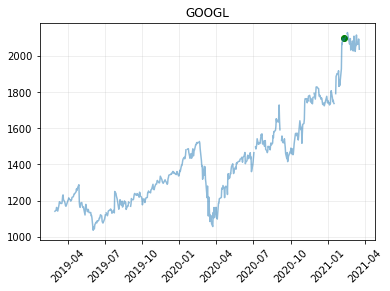

0 IUSA 23.458213988924996
1 IUSA 2.6499813785125
2 IUSA 5.22384444861251
TOTAL:  IUSA 31.332039816049985


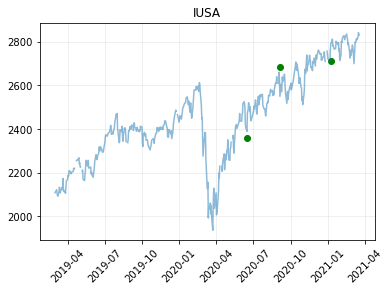

0 BARC 18.450100000719992
TOTAL:  BARC 17.59428866757999


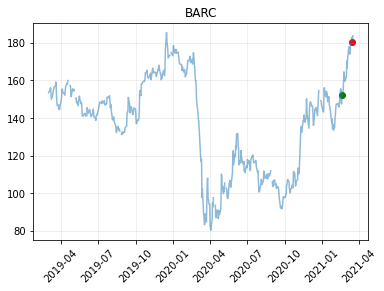

0 GME -186.62417951355357
1 GME -18.884404900154493
TOTAL:  GME -205.50858441370806


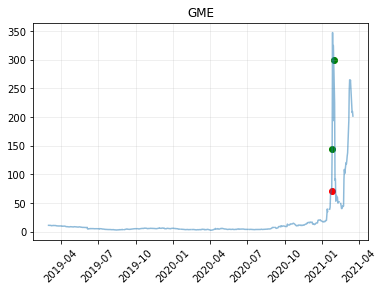

0 ECAR -7.749304041013488
TOTAL:  ECAR -7.749304041013488


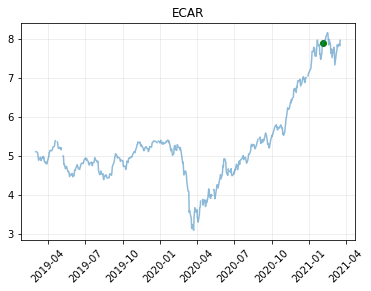

0 CNX1 -1.4323668543999872
TOTAL:  CNX1 -1.4323668543999872


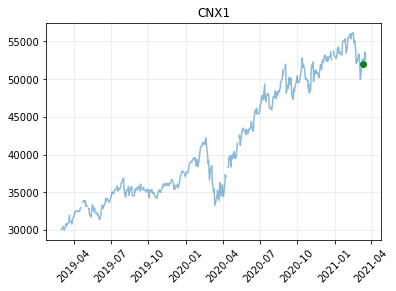

0 JDW 1.6800000000000068
1 JDW -4.75263593279999
TOTAL:  JDW -3.072635932799983


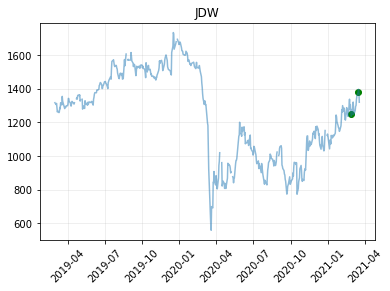

0 VUKE 14.331814680000008
1 VUKE 6.433130919999996
2 VUKE -0.3212100599999985
3 VUKE 0.32234453999999957
4 VUKE 2.4798291800000243
TOTAL:  VUKE 23.24590925999999


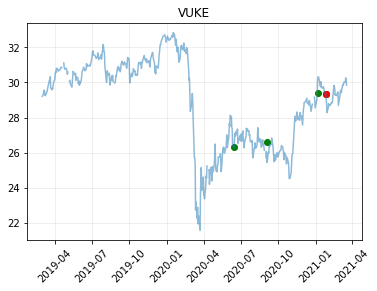

0 VAPX 34.54347131875001
1 VAPX 11.636691477500001
2 VAPX -1.5292110312500142
TOTAL:  VAPX 44.65095176500006


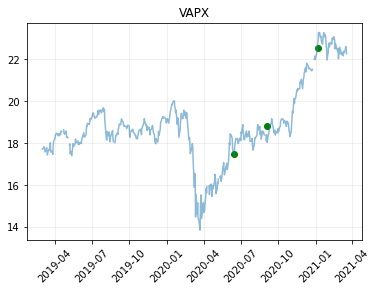

0 V -9.996929756490587
TOTAL:  V -9.996929756490587


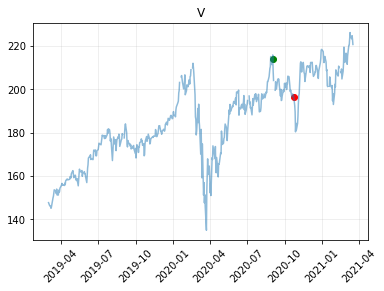

0 BB -7.975792999999998
TOTAL:  BB -7.975792999999998


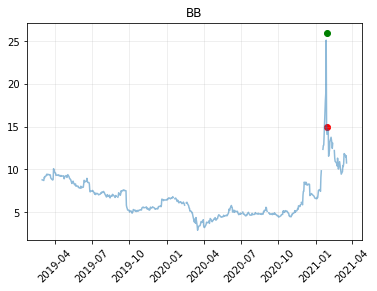

0 MA -9.366006686752101
TOTAL:  MA -9.366006686752101


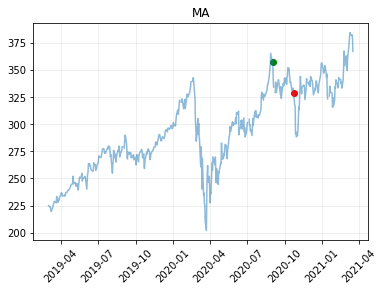

0 NAKD -3.1379791496900005
TOTAL:  NAKD -3.1379791496900005


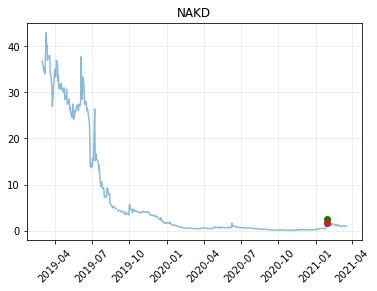

0 NOK -1.6052819999999994
TOTAL:  NOK -1.6052819999999994


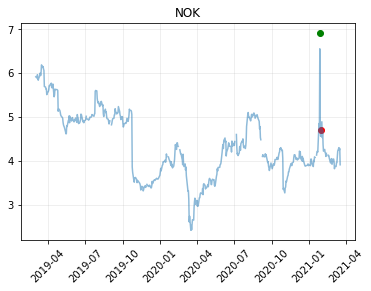

0 INRG 116.351475877
1 INRG 24.795628937500005
2 INRG 45.298737440249965
3 INRG -0.3167851342499999
4 INRG -29.828621220600013
TOTAL:  INRG 156.30043589989998


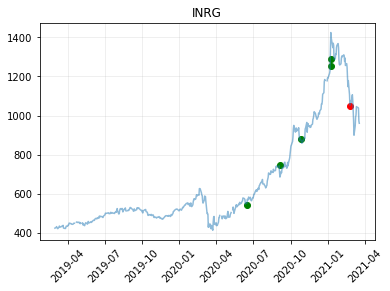

In [56]:
for ticker in wb_tickers:
    for ibuy in range(len(buys[buys['Ticker']==ticker_map[ticker]])):
        returns = ut.get_asset_returns_since_buy(ticker_map[ticker],ibuy)
        print(ibuy, ticker_map[ticker], returns)

    returns_tot = ut.get_asset_returns_total(ticker_map[ticker])
    print('TOTAL: ', ticker_map[ticker],returns_tot)
    
    plotSS.plot_activity_on_history(ticker_map[ticker])


# portfolio value (GBP) and other calculations

In [59]:
ut.get_portfolio_value()

1707.1527170947668

In [60]:
ut.get_portfolio_value() - (buys['Total (GBP)'].sum()-sells['Total (GBP)'].sum())

13.082717094767077

In [61]:
history[history['Action']=='Deposit']['Total (GBP)'].sum()